### Which ML-algorithms are used?
### Classification Problem<br>
Logistische Regression (LogisticRegression)<br>
Support Vector Classification (SVC)<br>
Random Forest (RandomForestClassifier)<br>
KNeighborsClassifier (Knn)<br>
Gaussian Naive Bayes (GaussianNB)<br>

###  Dataset
https://www.kaggle.com/datasets/mexwell/heart-disease-dataset/data <br>

In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df.reset_index(drop=True, inplace=True)
X = df.drop('target', axis=1)
y = df['target']

k=10 

kf = KFold(n_splits=k, shuffle=True, random_state=85) #42
#skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)


### Show fold distribution

In [3]:
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold + 1}")
    print("Train Index:", train_index)
    print("Test Index:", test_index)
    print()

Fold 1
Train Index: [   0    1    2 ... 1187 1188 1189]
Test Index: [   4   21   22   23   45   73   75   85   93  115  116  128  135  136
  139  156  160  172  186  188  201  203  205  220  236  240  273  279
  289  305  311  314  325  326  342  344  346  349  352  397  406  412
  416  434  450  453  481  488  516  518  527  537  544  585  596  606
  617  622  642  671  672  674  676  682  684  692  695  711  736  737
  740  752  753  757  769  775  779  794  822  850  859  862  884  889
  890  923  931  939  942  960  967 1006 1013 1029 1041 1046 1047 1050
 1051 1055 1056 1059 1070 1078 1082 1111 1114 1130 1138 1143 1144 1149
 1165 1169 1172 1173 1175 1176 1180]

Fold 2
Train Index: [   1    2    3 ... 1187 1188 1189]
Test Index: [   0    5   18   28   42   49   61   72   83   91   98  104  106  146
  149  150  153  170  180  202  206  211  214  219  239  241  244  260
  266  276  290  292  321  331  332  333  334  335  338  355  375  386
  399  407  408  415  421  427  430  435  437

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
logreg = LogisticRegression(solver='liblinear')
svc = SVC(kernel='rbf', C=1.0, gamma='scale')
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()

## Code for Accuracy
logreg_cross_val_scores = cross_val_score(logreg, X, y, cv=kf, scoring='accuracy').mean()
svc_cross_val_scores = cross_val_score(svc, X, y, cv=kf, scoring='accuracy').mean()
rf_classifier_cross_val_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy').mean()
knn_cross_val_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy').mean()
gnb_cross_val_scores = cross_val_score(gnb, X, y, cv=kf, scoring='accuracy').mean()

In [6]:
# ### Code for F1-Score
logreg_cross_val_scores = cross_val_score(logreg, X, y, cv=kf, scoring="f1").mean()
svc_cross_val_scores = cross_val_score(svc, X, y, cv=kf, scoring='f1').mean()
rf_classifier_cross_val_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='f1').mean()
knn_cross_val_scores = cross_val_score(knn, X, y, cv=kf, scoring='f1').mean()
gnb_cross_val_scores = cross_val_score(gnb, X, y, cv=kf, scoring='f1').mean()

In [7]:
cross_val_scores = {
    'Logistic Regression': logreg_cross_val_scores,
    'Support Vector Classifier': svc_cross_val_scores,
    'Random Forest Classifier': rf_classifier_cross_val_scores,
    'K-Nearest Neighbors': knn_cross_val_scores,
    'Gaussian Naive Bayes': gnb_cross_val_scores
}

sorted_cross_val_scores = sorted(cross_val_scores.items(), key=lambda x: x[1], reverse=True)

for i, (model, score) in enumerate(sorted_cross_val_scores, start=1):
    rounded_score = round(score, 3)
    print(f"{i}. {model}: {rounded_score}")

1. Random Forest Classifier: 0.937
2. Gaussian Naive Bayes: 0.844
3. Logistic Regression: 0.836
4. Support Vector Classifier: 0.717
5. K-Nearest Neighbors: 0.713


In [8]:
import matplotlib.pyplot as plt

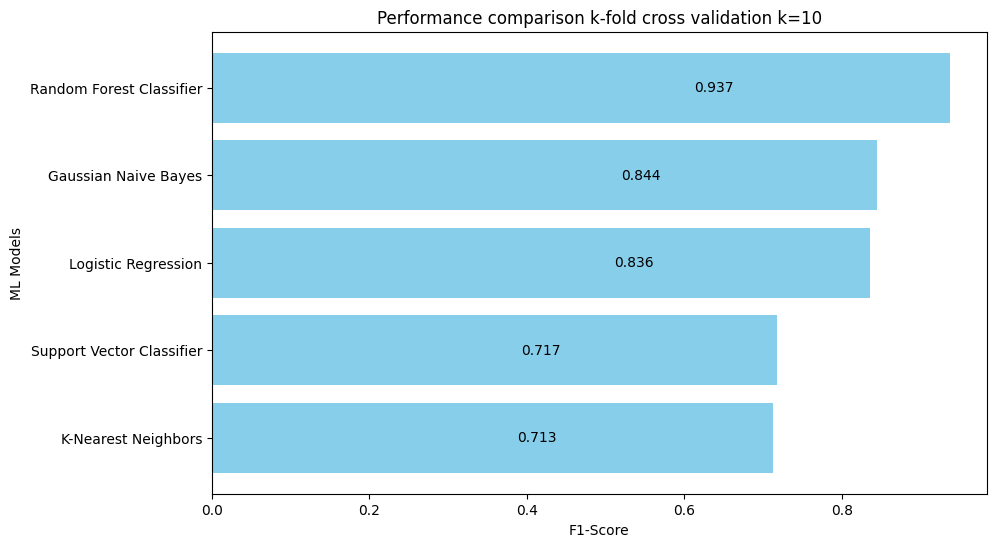

In [9]:
models = [model for model, _ in sorted_cross_val_scores]
scores = [score for _, score in sorted_cross_val_scores]

plt.figure(figsize=(10, 6))
bars = plt.barh(models, scores, color='skyblue')
plt.xlabel('F1-Score')
plt.ylabel('ML Models')
plt.title('Performance comparison k-fold cross validation k=10')
for bar, score in zip(bars, scores):
    plt.text(bar.get_width() - 0.3, bar.get_y() + bar.get_height()/2, f'{score:.3f}', 
             va='center', ha='center', color='black')

plt.gca().invert_yaxis()  
plt.show()


In [10]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

In [11]:
all_fold_scores = {model: [] for model in ['Logistic Regression', 'Support Vector Classifier', 'Random Forest Classifier', 'K-Nearest Neighbors', 'Gaussian Naive Bayes']}
placement_history = {model: [] for model in all_fold_scores.keys()}
mean_scores_history = {model: [] for model in all_fold_scores.keys()}  

for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    print(f"Fold {fold_idx}:")
    
    #X_train, X_test = X[train_idx], X[test_idx]
    #y_train, y_test = y[train_idx], y[test_idx]
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    logreg.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    rf_classifier.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    gnb.fit(X_train, y_train)
    
   #logreg_score = logreg.score(X_test, y_test)
    #svc_score = svc.score(X_test, y_test)
    #rf_classifier_score = rf_classifier.score(X_test, y_test)
    #knn_score = knn.score(X_test, y_test)
    #gnb_score = gnb.score(X_test, y_test)

    logreg_score = f1_score(y_test, logreg.predict(X_test))
    svc_score = f1_score(y_test, svc.predict(X_test))
    rf_classifier_score = f1_score(y_test, rf_classifier.predict(X_test))
    knn_score = f1_score(y_test, knn.predict(X_test))
    gnb_score = f1_score(y_test, gnb.predict(X_test))
    
    all_fold_scores['Logistic Regression'].append(logreg_score)
    all_fold_scores['Support Vector Classifier'].append(svc_score)
    all_fold_scores['Random Forest Classifier'].append(rf_classifier_score)
    all_fold_scores['K-Nearest Neighbors'].append(knn_score)
    all_fold_scores['Gaussian Naive Bayes'].append(gnb_score)

    cross_val_scores_actual_fold = {
        'Logistic Regression': logreg_score,
        'Support Vector Classifier': svc_score,
        'Random Forest Classifier': rf_classifier_score,
        'K-Nearest Neighbors': knn_score,
        'Gaussian Naive Bayes': gnb_score
    }
    
    sorted_cross_val_scores_actual_fold = sorted(cross_val_scores_actual_fold.items(), key=lambda x: x[1], reverse=True)

    for i, (model, score) in enumerate(sorted_cross_val_scores_actual_fold, start=1):
        rounded_score = round(score, 3)
        print(f"{i}. {model}: {rounded_score}")

    mean_scores = {model: np.mean(scores) for model, scores in all_fold_scores.items()}
    sorted_mean_scores = sorted(mean_scores.items(), key=lambda x: x[1], reverse=True)

    print()  

    for i, (model, mean_score) in enumerate(sorted_mean_scores, start=1):
        print(f"{i}. Average for {model} after {fold_idx} Folds: {round(mean_score, 3)}")
        placement_history[model].append(i)
        mean_scores_history[model].append(round(mean_score, 3))  
        
    print()



Fold 1:
1. Random Forest Classifier: 0.952
2. Gaussian Naive Bayes: 0.838
3. Logistic Regression: 0.835
4. K-Nearest Neighbors: 0.734
5. Support Vector Classifier: 0.703

1. Average for Random Forest Classifier after 1 Folds: 0.952
2. Average for Gaussian Naive Bayes after 1 Folds: 0.838
3. Average for Logistic Regression after 1 Folds: 0.835
4. Average for K-Nearest Neighbors after 1 Folds: 0.734
5. Average for Support Vector Classifier after 1 Folds: 0.703

Fold 2:
1. Random Forest Classifier: 0.92
2. Logistic Regression: 0.804
3. Gaussian Naive Bayes: 0.8
4. Support Vector Classifier: 0.678
5. K-Nearest Neighbors: 0.618

1. Average for Random Forest Classifier after 2 Folds: 0.936
2. Average for Gaussian Naive Bayes after 2 Folds: 0.819
3. Average for Logistic Regression after 2 Folds: 0.819
4. Average for Support Vector Classifier after 2 Folds: 0.691
5. Average for K-Nearest Neighbors after 2 Folds: 0.676

Fold 3:
1. Random Forest Classifier: 0.891
2. Logistic Regression: 0.832
3.

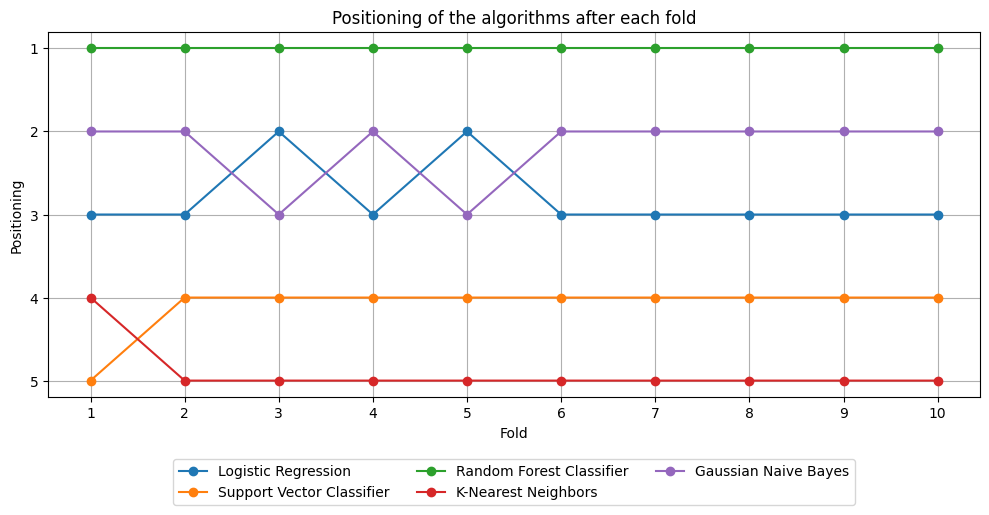

In [12]:
plt.figure(figsize=(10, 6))
for model, placements in placement_history.items():
    plt.plot(range(1, len(placements) + 1), placements, marker='o', label=model)

plt.gca().invert_yaxis()  
plt.xticks(range(1, kf.get_n_splits() + 1))
plt.yticks(range(1, max(max(placements) for placements in placement_history.values()) + 1))  

plt.xlabel('Fold')
plt.ylabel('Positioning')
plt.title('Positioning of the algorithms after each fold')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.9])  
plt.show()


In [13]:
import scipy.stats as stats
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [15]:
acc_rf = mean_scores_history['Random Forest Classifier']
acc_lr = mean_scores_history['Logistic Regression']
acc_gnb = mean_scores_history['Gaussian Naive Bayes']
acc_knn = mean_scores_history['K-Nearest Neighbors']
acc_svc = mean_scores_history['Support Vector Classifier']

best_model_name = sorted_cross_val_scores[0][0]

if best_model_name == 'Random Forest Classifier':
    acc_best = acc_rf
elif best_model_name == 'Logistic Regression':
    acc_best = acc_lr
elif best_model_name == 'Gaussian Naive Bayes':
    acc_best = acc_gnb
elif best_model_name == 'K-Nearest Neighbors':
    acc_best = acc_knn
elif best_model_name == 'Support Vector Classifier':
    acc_best = acc_svc

def find_earliest_significant_fold_ttest(acc_best, acc):
    for i in range(len(acc_best)):
        t_stat, p_value = ttest_ind(acc_best[:i+1], acc[:i+1],alternative='greater')                                                                 
        if p_value < 0.05:  
            return i+1, p_value
    return None, None

def find_earliest_significant_fold_manwhitneyu(acc_best, acc):
    for i in range(len(acc_best)):
        t_stat, p_value = mannwhitneyu(acc_best[:i+1], acc[:i+1],alternative='greater')                                                              
        if p_value < 0.05:  
            return i+1, p_value
    return None, None

algorithms = {
    'Logistic Regression': acc_lr,
    'Gaussian Naive Bayes': acc_gnb,
    'K-Nearest Neighbors': acc_knn,
    'Support Vector Classifier': acc_svc,
    'Random Forest Classifier': acc_rf
}
print("T-Test:")
for algo_name, acc in algorithms.items():
    if acc_best != acc:
        fold, p_value = find_earliest_significant_fold_ttest(acc_best, acc)
        if fold:
            print(f"{best_model_name}  is significantly better than {algo_name} from Fold {fold} (p-Wert: {p_value:.4f})")
        else:
            print(f"{best_model_name} is not significantly better than {algo_name} within 10 folds.")

print("Mann-Whitney-U-Test:")
for algo_name, acc in algorithms.items():
    if acc_best != acc:
        fold, p_value = find_earliest_significant_fold_manwhitneyu(acc_best, acc)
        if fold:
            print(f"{best_model_name} is significantly better than {algo_name} from Fold {fold} (p-Wert: {p_value:.4f})")
        else:
            print(f"{best_model_name} is not significantly better than {algo_name} within 10 folds.")

T-Test:
Random Forest Classifier  is significantly better than Logistic Regression from Fold 2 (p-Wert: 0.0046)
Random Forest Classifier  is significantly better than Gaussian Naive Bayes from Fold 2 (p-Wert: 0.0057)
Random Forest Classifier  is significantly better than K-Nearest Neighbors from Fold 2 (p-Wert: 0.0077)
Random Forest Classifier  is significantly better than Support Vector Classifier from Fold 2 (p-Wert: 0.0008)
Mann-Whitney-U-Test:
Random Forest Classifier is significantly better than Logistic Regression from Fold 4 (p-Wert: 0.0143)
Random Forest Classifier is significantly better than Gaussian Naive Bayes from Fold 4 (p-Wert: 0.0143)
Random Forest Classifier is significantly better than K-Nearest Neighbors from Fold 4 (p-Wert: 0.0143)
Random Forest Classifier is significantly better than Support Vector Classifier from Fold 4 (p-Wert: 0.0143)


### **Evaluation**

The results can be evaluated in three ways:<br>
1.interpretation of the diagram <br>
2.Statistical significance using t-tests<br>
3. statistical significance using the Mann-Whitney U-test<br>
<br>
Random Forest Classifier is clearly better than all others in this data set. In the diagram you can see that it was best in every fold and the T-tests and Mann-Whitney U-test confirm this